In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

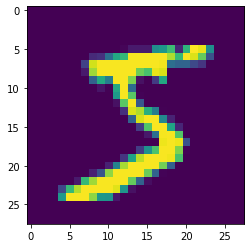

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
#Normalization

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #takes the image of 28*28 size and flattens it to 1*784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [9]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2626 - accuracy: 0.9228
Epoch 2/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1088 - accuracy: 0.9667
Epoch 3/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0723 - accuracy: 0.9772
Epoch 4/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0542 - accuracy: 0.9823
Epoch 5/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0417 - accuracy: 0.9866
Epoch 6/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0333 - accuracy: 0.9890
Epoch 7/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0258 - accuracy: 0.9914
Epoch 8/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0207 - accuracy: 0.9930
Epoch 9/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0191 - accuracy: 0.9935
Epoch 10/10
60

In [10]:
val_loss,val_acc=model.evaluate(X_test,Y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [12]:
val_loss

0.10555962787737372

In [13]:
val_acc

0.9754

In [ ]:
model.save(r'~path\digit_model.model')

In [15]:
new_model = tf.keras.models.load_model(r'~path\digit_model.model')
prediction = new_model.predict(X_test)

In [16]:
prediction

array([[2.5136223e-14, 3.3820731e-11, 2.4790919e-11, ..., 1.0000000e+00,
        2.5118720e-11, 5.0235094e-10],
       [6.3055642e-19, 5.7582925e-11, 1.0000000e+00, ..., 3.1163947e-15,
        3.1804886e-17, 6.6456187e-25],
       [1.2950526e-12, 9.9999726e-01, 5.6230975e-10, ..., 1.3132502e-07,
        2.1316328e-06, 6.5561827e-11],
       ...,
       [3.9330778e-16, 3.3453108e-11, 1.6992907e-14, ..., 6.5017161e-08,
        1.4922049e-08, 3.1386378e-08],
       [2.0958253e-13, 2.5613858e-14, 3.5179981e-16, ..., 5.9483259e-11,
        2.1493943e-08, 6.6614833e-17],
       [2.4450686e-11, 3.3946313e-13, 1.2042183e-11, ..., 3.6338967e-15,
        6.6447212e-12, 4.7162679e-14]], dtype=float32)

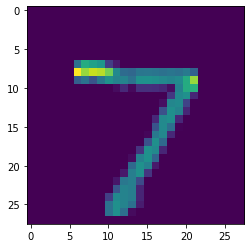

In [17]:
plt.imshow(X_test[0])

In [18]:
np.argmax(prediction[0])

7